array([0, 0, 0, ..., 0, 0, 0])

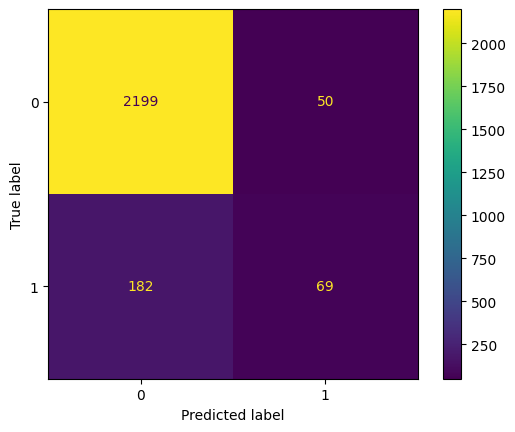

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

# генерируем синтетические данные для бинарной классификации
X, y = make_classification(n_samples=10_000, weights=[0.9, 0.1], random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# обучаем классификатор с прогогом принятия решений "по умолчанию" threshold=0.5
clf = LogisticRegression(C=1e6, random_state=0).fit(X_train, y_train)
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
# _ - имя переменной, которая дальше не нужна, но по синтаксису
# требуется для вызова метода справа
clf.predict(X_test)  # применение классификатора на тестовых данных

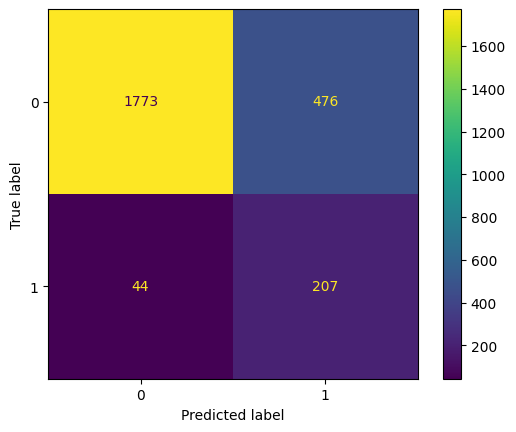

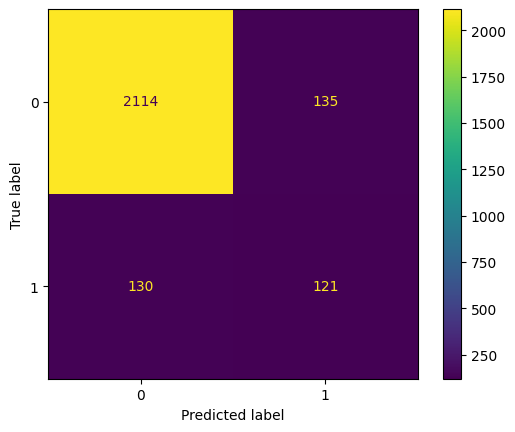

In [2]:
# Исследуем влияние порога принятия threshold решений на вид матрицы неточностей
from sklearn.model_selection import FixedThresholdClassifier

# На основе clf создаем бинарный классификатор с ручной устанавкой threshold=0.1
classifier_01 = FixedThresholdClassifier(clf, threshold=0.1)
classifier_01.fit(X_train, y_train) # обучаем класификатор с 0.1
# _ - имя переменной, она дальше не нужна, но по синтаксису требуется для вызова метода справа
_ = ConfusionMatrixDisplay.from_estimator(classifier_01, X_test, y_test)

# создаем классификатор на основе clf с threshold=0.3
classifier_03 = FixedThresholdClassifier(clf, threshold=0.3)
classifier_03.fit(X_train, y_train) # обучаем класификатор с 0.1
_ = ConfusionMatrixDisplay.from_estimator(classifier_03, X_test, y_test)

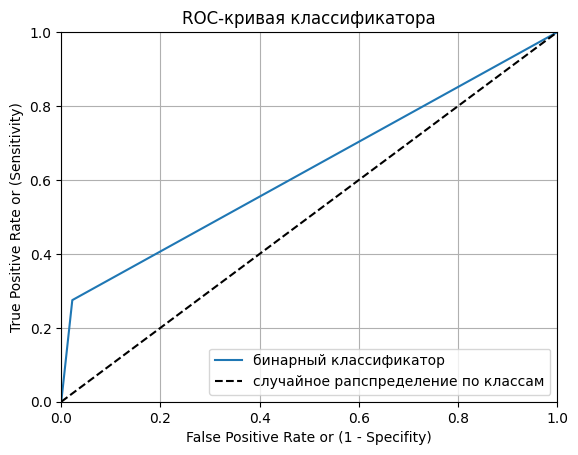

In [8]:
# Построение ROC-кривой классификатора
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_score=clf.predict(X_test) # применяем классификатор для тестовых данных
fpr, tpr, thresholds = roc_curve(y_test, y_score) # Вычисление fpr, tpr
roc_auc = auc(fpr, tpr)  # вычисление площади под ROC-кривой

# Построеие ROC кривой
plt.plot(fpr, tpr, label='Площадь под ROC-кривой (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # ROC-кривая при случайной классификации
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC-кривая классификатора')
#plt.legend(loc="lower right")
plt.legend(('бинарный классификатор','случайное рапспределение по классам'),
           loc="lower right")
plt.grid(6)
